In [28]:
import pandas as pd

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris dan jumlah kapal
print("Jumlah baris data:", jumlah_baris)

jumlah_kapal = data_frame['msg_mmsi'].nunique()
print("Jumlah kapal:", jumlah_kapal)

Jumlah baris data: 568670
Jumlah kapal: 1403


In [23]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed', 'hour', 'day', 'month', 'year',
       'Latitude Prediksi', 'Longitude Prediksi', 'MSE Latitude',
       'MSE Longitude'],
      dtype='object')


In [24]:
# Menampilkan summary data
print("Summary data:")
print(data_frame.describe())

Summary data:
           msg_mmsi       msg_kind  msg_repeat       data_lat       data_lon  \
count  5.686700e+05  568670.000000    568670.0  568670.000000  568670.000000   
mean   5.171715e+08       4.289154         0.0      -5.904608     106.053657   
std    5.240261e+07       6.038226         0.0       0.133165       0.243528   
min    1.234568e+08       1.000000         0.0      -7.045150     104.631100   
25%    5.250071e+08       1.000000         0.0      -5.962510     105.963630   
50%    5.250194e+08       1.000000         0.0      -5.935000     105.995680   
75%    5.251060e+08       3.000000         0.0      -5.882320     106.112250   
max    8.100160e+08      19.000000         0.0      -5.087190     107.459870   

            data_nav       data_rot       data_sog       data_cog  \
count  568670.000000  568670.000000  568670.000000  568670.000000   
mean        2.160974     -63.076718       2.041381     182.020836   
std         3.873036      65.531469       3.879322     107

In [29]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
import pandas as pd
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
print(data_frame.columns)


Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed', 'hour', 'day', 'month', 'year',
       'Latitude Prediksi', 'Longitude Prediksi', 'MSE Latitude',
       'MSE Longitude'],
      dtype='object')


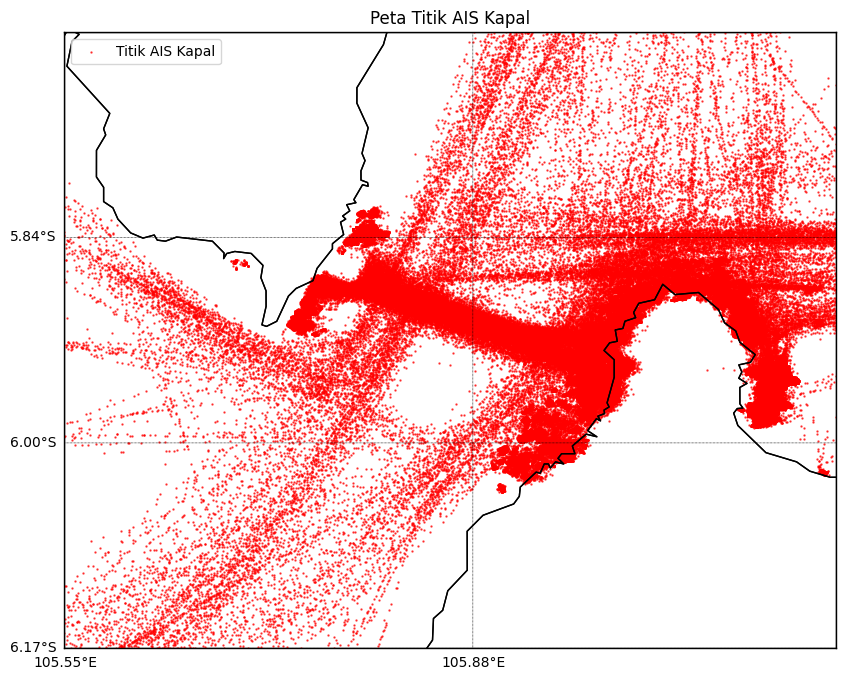

In [17]:
# Mengambil batas minimum dan maksimum latitude dan longitude dari data AIS
lat_min = -6.17
lat_max = -5.67
lon_min = 105.55
lon_max = 106.18

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Mengambil koordinat garis tepi pantai dari peta yang ditampilkan
coastline_latlon = m.drawcoastlines().get_segments()

# Plot titik-titik awal kapal pada peta
m.scatter(
    data_frame['Longitude Prediksi'], 
    data_frame['Latitude Prediksi'], 
    latlon=True, 
    s=0.5, 
    c='red', 
    marker='o', 
    alpha=0.7, 
    label='Titik AIS Kapal'
)

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legenda
plt.legend(loc='best')

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "dbscan range.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal')
plt.show()


In [17]:
lat_min = -6.10
lat_max = -5.71
lon_min = 105.63
lon_max = 106

print(lat_min,lat_max,lon_min,lon_max)

-6.6651974 -5.1138678 104.84209 107.40374


In [25]:
import pandas as pd

# Baca data CSV
file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"
data_frame = pd.read_csv(file_path)

# Tentukan batas geografis
lat_min = -6.17
lat_max = -5.67
lon_min = 105.55
lon_max = 106.18

# Buat filter berdasarkan batas geografis
geographic_filter = (data_frame['Latitude Prediksi'] >= lat_min) & (data_frame['Latitude Prediksi'] <= lat_max) & (data_frame['Longitude Prediksi'] >= lon_min) & (data_frame['Longitude Prediksi'] <= lon_max)

# Terapkan filter ke data frame
filtered_data = data_frame[geographic_filter]

# Simpan data yang sudah difilter ke dalam file CSV baru
filtered_data.to_csv("dbscan_data.csv", index=False)


In [1]:
import pandas as pd

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/dbscan_klastering.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris dan jumlah kapal
print("Jumlah baris data:", jumlah_baris)

jumlah_kapal = data_frame['msg_mmsi'].nunique()
print("Jumlah kapal:", jumlah_kapal)

Jumlah baris data: 10000
Jumlah kapal: 835


In [2]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name.', 'dt_date.time1.1',
       'dt_date.time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed', 'hour', 'day', 'month', 'year',
       'Latitude.Prediksi', 'Longitude.Prediksi', 'MSE.Latitude',
       'MSE.Longitude', 'Cluster_Label'],
      dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\3274105992.py:55: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\3274105992.py:72: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


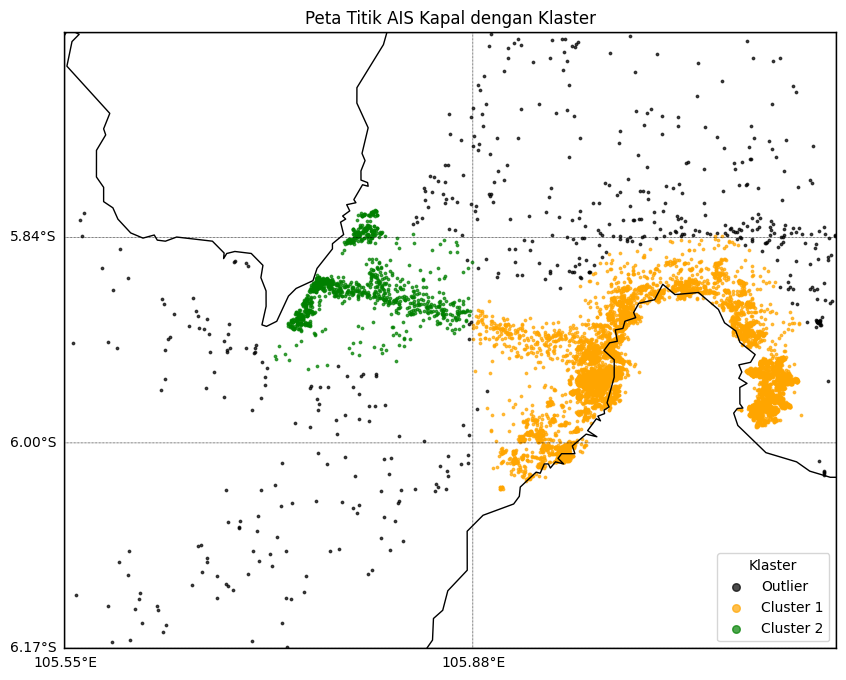

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Mengambil batas minimum dan maksimum latitude dan longitude dari data AIS
lat_min = -6.17
lat_max = -5.67
lon_min = 105.55
lon_max = 106.18

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Plot titik-titik awal kapal pada peta dengan warna dan ukuran berdasarkan klaster
for cluster_id in set(data_frame['Cluster_Label']):
    cluster_data = data_frame[data_frame['Cluster_Label'] == cluster_id]
    if cluster_id == 0:
        color = 'black'  # Warna untuk outlier
        label = 'Outlier'
        marker_size = 3  # Ukuran untuk outlier
    elif cluster_id == 1:
        color = 'orange'  # Warna untuk Kluster 1
        label = 'Cluster 1'
        marker_size = 3  # Ukuran untuk Kluster 1
    elif cluster_id == 2:
        color = 'green'  # Warna untuk Kluster 2
        label = 'Cluster 2'
        marker_size = 3  # Ukuran untuk Kluster 2
    else:
        color = 'blue'  # Ganti 'green' dengan warna lain jika diperlukan
        label = f'Cluster {cluster_id}'
        marker_size = 2  # Ukuran untuk kluster lainnya
    
    m.scatter(
        cluster_data['Longitude.Prediksi'], 
        cluster_data['Latitude.Prediksi'], 
        latlon=True, 
        s=marker_size,  # Mengatur ukuran titik
        alpha=0.7, 
        label=label,
        color=color
    )# Menambahkan legend di sudut kanan bawah dengan ukuran lambang yang lebih besar
legend = plt.legend(loc='lower right', title='Klaster')
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])  # Ukuran lambang legend

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legend di sudut kanan bawah dengan ukuran lambang yang lebih besar
legend = plt.legend(loc='lower right', title='Klaster')
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])  # Ukuran lambang legend

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "dbscan_range_clusters.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal dengan Klaster')
plt.show()


In [5]:
# Hitung jumlah data dalam masing-masing klaster
cluster_counts = data_frame['Cluster_Label'].value_counts()

# Menampilkan jumlah data dalam masing-masing klaster
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} data")

# Atau Anda dapat menyimpan hasilnya ke dalam DataFrame untuk lebih lanjut
cluster_summary = pd.DataFrame({'Cluster_Label': cluster_counts.index, 'Count': cluster_counts.values})
print(cluster_summary)


Cluster 1: 8318 data
Cluster 2: 1152 data
Cluster 0: 530 data
   Cluster_Label  Count
0              1   8318
1              2   1152
2              0    530


In [6]:
# Menghitung jumlah kapal di masing-masing klaster
ship_counts = data_frame.groupby('Cluster_Label')['msg_mmsi'].nunique()

# Menghitung jumlah data AIS masing-masing kapal
ais_data_counts = data_frame.groupby('msg_mmsi')['Cluster_Label'].count()

# Menampilkan jumlah kapal di masing-masing klaster
for cluster_id, count in ship_counts.items():
    print(f"Klaster {cluster_id}: {count} kapal")

# Menampilkan jumlah data AIS masing-masing kapal
for ship_id, count in ais_data_counts.items():
    print(f"Kapal {ship_id}: {count} data AIS")


Klaster 0: 344 kapal
Klaster 1: 613 kapal
Klaster 2: 137 kapal
Kapal 123456780: 1 data AIS
Kapal 200000000: 22 data AIS
Kapal 205717000: 5 data AIS
Kapal 209140000: 2 data AIS
Kapal 210363000: 1 data AIS
Kapal 215454000: 2 data AIS
Kapal 219127000: 1 data AIS
Kapal 229788000: 15 data AIS
Kapal 232004456: 2 data AIS
Kapal 232012242: 14 data AIS
Kapal 232012730: 1 data AIS
Kapal 235070466: 13 data AIS
Kapal 238293000: 2 data AIS
Kapal 239947000: 1 data AIS
Kapal 240520000: 1 data AIS
Kapal 249003000: 1 data AIS
Kapal 249284000: 1 data AIS
Kapal 249799000: 11 data AIS
Kapal 249967000: 3 data AIS
Kapal 255805563: 1 data AIS
Kapal 257824000: 2 data AIS
Kapal 258669000: 7 data AIS
Kapal 259885000: 2 data AIS
Kapal 305864000: 1 data AIS
Kapal 310687000: 1 data AIS
Kapal 310743000: 1 data AIS
Kapal 311000297: 1 data AIS
Kapal 311000847: 1 data AIS
Kapal 311000859: 1 data AIS
Kapal 311000877: 1 data AIS
Kapal 311018800: 1 data AIS
Kapal 319027200: 1 data AIS
Kapal 319118900: 1 data AIS
Kapal 31

In [7]:
# Inisialisasi dictionary untuk menyimpan koordinat maksimum dan minimum
cluster_coordinates = {}

# Iterasi melalui setiap klaster
for cluster_id in set(data_frame['Cluster_Label']):
    cluster_data = data_frame[data_frame['Cluster_Label'] == cluster_id]
    
    # Ambil nilai maksimum dan minimum dari latitude dan longitude dalam klaster
    lat_min = cluster_data['Latitude.Prediksi'].min()
    lat_max = cluster_data['Latitude.Prediksi'].max()
    lon_min = cluster_data['Longitude.Prediksi'].min()
    lon_max = cluster_data['Longitude.Prediksi'].max()
    
    # Fungsi untuk mengonversi desimal ke format DMS
    def decimal_to_dms(decimal, is_latitude):
        degrees = int(decimal)
        minutes = int((decimal - degrees) * 60)
        seconds = (decimal - degrees - minutes / 60) * 3600
        if is_latitude:
            if degrees < 0:
                direction = 'LS'
            else:
                direction = 'LU'
        else:
            if degrees < 0:
                direction = 'BB'
            else:
                direction = 'BT'
        return abs(degrees), minutes, seconds, direction
    
    lat_min_dms = decimal_to_dms(lat_min, True)
    lat_max_dms = decimal_to_dms(lat_max, True)
    lon_min_dms = decimal_to_dms(lon_min, False)
    lon_max_dms = decimal_to_dms(lon_max, False)
    
    # Simpan koordinat maksimum dan minimum dalam dictionary
    cluster_coordinates[cluster_id] = {
        'lat_min': lat_min_dms,
        'lat_max': lat_max_dms,
        'lon_min': lon_min_dms,
        'lon_max': lon_max_dms
    }

# Menampilkan koordinat maksimum dan minimum masing-masing klaster dalam format yang benar
for cluster_id, coordinates in cluster_coordinates.items():
    print(f"Cluster {cluster_id}:")
    print(f"Latitude Min: {coordinates['lat_min'][0]}\u00b0 {coordinates['lat_min'][1]}' {coordinates['lat_min'][2]:.3f}\" {coordinates['lat_min'][3]}")
    print(f"Longitude Min: {coordinates['lon_min'][0]}\u00b0 {coordinates['lon_min'][1]}' {coordinates['lon_min'][2]:.3f}\" {coordinates['lon_min'][3]}")
    print(f"Latitude Max: {coordinates['lat_max'][0]}\u00b0 {coordinates['lat_max'][1]}' {coordinates['lat_max'][2]:.3f}\" {coordinates['lat_max'][3]}")
    print(f"Longitude Max: {coordinates['lon_max'][0]}\u00b0 {coordinates['lon_max'][1]}' {coordinates['lon_max'][2]:.3f}\" {coordinates['lon_max'][3]}")
    print()


Cluster 0:
Latitude Min: 6° -10' -7.176" LS
Longitude Min: 105° 33' 24.516" BT
Latitude Max: 5° -40' -16.474" LS
Longitude Max: 106° 10' 44.004" BT

Cluster 1:
Latitude Min: 6° -2' -27.801" LS
Longitude Min: 105° 52' 59.376" BT
Latitude Max: 5° -50' -6.950" LS
Longitude Max: 106° 9' 4.176" BT

Cluster 2:
Latitude Min: 5° -56' -35.462" LS
Longitude Min: 105° 43' 19.668" BT
Latitude Max: 5° -48' -52.021" LS
Longitude Max: 105° 52' 57.360" BT



In [37]:
import pandas as pd

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)


# Batas wilayah klaster 1
latitude_min_1 = -6.041055833333333
longitude_min_1 = 105.88315999999999
latitude_max_1 = -5.835263888888889
longitude_max_1 = 106.15116

# Batas wilayah klaster 2
latitude_min_2 = -5.943183888888889
longitude_min_2 = 105.72213
latitude_max_2 = 5 -5.814450277777778
longitude_max_2 = 105.8826

# Filter data berdasarkan batas wilayah klaster 1 dan klaster 2
klaster_1_data = data_frame[
    (data_frame['Latitude Prediksi'] >= latitude_min_1) &
    (data_frame['Latitude Prediksi'] <= latitude_max_1) &
    (data_frame['Longitude Prediksi'] >= longitude_min_1) &
    (data_frame['Longitude Prediksi'] <= longitude_max_1)
]

klaster_2_data = data_frame[
    (data_frame['Latitude Prediksi'] >= latitude_min_2) &
    (data_frame['Latitude Prediksi'] <= latitude_max_2) &
    (data_frame['Longitude Prediksi'] >= longitude_min_2) &
    (data_frame['Longitude Prediksi'] <= longitude_max_2)
]

# Tambahkan kolom 'klaster' ke masing-masing DataFrame
klaster_1_data['Cluster_Label'] = '1'
klaster_2_data['Cluster_Label'] = '2'

# Gabungkan dua DataFrames menjadi satu
final_data = pd.concat([klaster_1_data, klaster_2_data], ignore_index=True)

# Simpan data ke dalam file FINAL_568670.csv
final_data.to_csv("FINAL_568670.csv", index=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\1459801099.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klaster_1_data['Cluster_Label'] = '1'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\1459801099.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klaster_2_data['Cluster_Label'] = '2'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\2874297183.py:57: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\2874297183.py:74: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


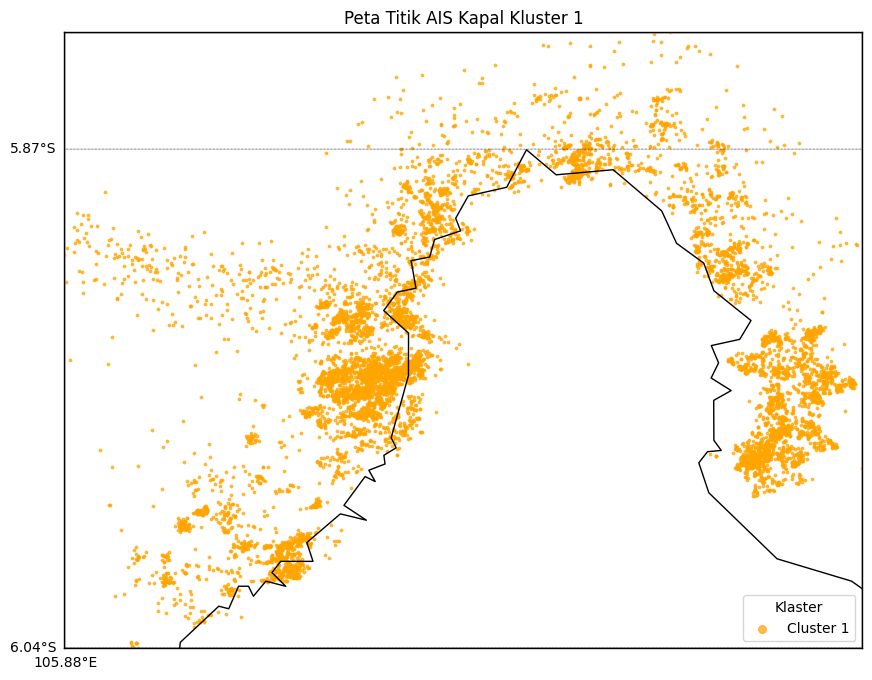

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/dbscan_klastering.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)

# Mengambil data kluster 1
cluster_1_data = data_frame[data_frame['Cluster_Label'] == 1]

# Mengambil batas minimum dan maksimum latitude dan longitude dari data kluster 1
lat_min = cluster_1_data['Latitude.Prediksi'].min()
lat_max = cluster_1_data['Latitude.Prediksi'].max()
lon_min = cluster_1_data['Longitude.Prediksi'].min()
lon_max = cluster_1_data['Longitude.Prediksi'].max()

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude AIS
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Plot titik-titik awal kapal pada peta dengan warna dan ukuran berdasarkan klaster
for cluster_id in set(cluster_1_data['Cluster_Label']):
    cluster_data = cluster_1_data[cluster_1_data['Cluster_Label'] == cluster_id]
    if cluster_id == 0:
        color = 'black'  # Warna untuk outlier
        label = 'Outlier'
        marker_size = 3  # Ukuran untuk outlier
    elif cluster_id == 1:
        color = 'orange'  # Warna untuk Kluster 1
        label = 'Cluster 1'
        marker_size = 3  # Ukuran untuk Kluster 1
    
    m.scatter(
        cluster_data['Longitude.Prediksi'], 
        cluster_data['Latitude.Prediksi'], 
        latlon=True, 
        s=marker_size,  # Mengatur ukuran titik
        alpha=0.7, 
        label=label,
        color=color
    )

# Menambahkan legend di sudut kanan bawah dengan ukuran lambang yang lebih besar
legend = plt.legend(loc='lower right', title='Klaster')
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])  # Ukuran lambang legend

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legend di sudut kanan bawah dengan ukuran lambang yang lebih besar
legend = plt.legend(loc='lower right', title='Klaster')
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])  # Ukuran lambang legend

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "dbscan_cluster_1.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal Kluster 1')
plt.show()


In [9]:
# Mengambil batas minimum dan maksimum latitude dan longitude dari data kluster 1
lat_min = cluster_1_data['Latitude.Prediksi'].min()
lat_max = cluster_1_data['Latitude.Prediksi'].max()
lon_min = cluster_1_data['Longitude.Prediksi'].min()
lon_max = cluster_1_data['Longitude.Prediksi'].max()

print(lat_min, lat_max, lon_min,lon_max)



-6.0410557 -5.835264 105.88316 106.15116


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13864\3717037097.py:69: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


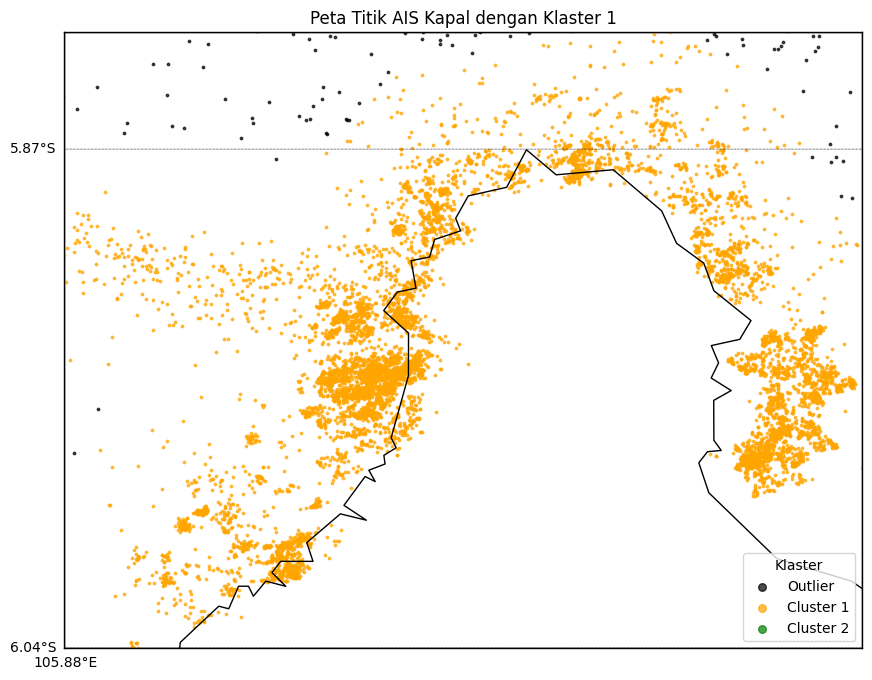

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Mengambil batas minimum dan maksimum latitude dan longitude dari kluster 1
lat_min = -6.0410557
lat_max = -5.835264
lon_min = 105.88316
lon_max = 106.15116

# Menyiapkan plot dengan latar belakang peta sesuai dengan batas latitude dan longitude kluster 1
plt.figure(figsize=(12, 8))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,   # Batas lintang minimum peta
    urcrnrlat=lat_max,   # Batas lintang maksimum peta
    llcrnrlon=lon_min,   # Batas bujur minimum peta
    urcrnrlon=lon_max,   # Batas bujur maksimum peta
    resolution='h'
)

# Menampilkan garis tepi pantai dari peta yang ditampilkan
m.drawcoastlines()

# Plot titik-titik awal kapal pada peta dengan warna dan ukuran berdasarkan klaster
for cluster_id in set(data_frame['Cluster_Label']):
    cluster_data = data_frame[data_frame['Cluster_Label'] == cluster_id]
    if cluster_id == 0:
        color = 'black'  # Warna untuk outlier
        label = 'Outlier'
        marker_size = 3  # Ukuran untuk outlier
    elif cluster_id == 1:
        color = 'orange'  # Warna untuk Kluster 1
        label = 'Cluster 1'
        marker_size = 3  # Ukuran untuk Kluster 1
    elif cluster_id == 2:
        color = 'green'  # Warna untuk Kluster 2
        label = 'Cluster 2'
        marker_size = 3  # Ukuran untuk Kluster 2
    else:
        color = 'blue'  # Ganti 'green' dengan warna lain jika diperlukan
        label = f'Cluster {cluster_id}'
        marker_size = 2  # Ukuran untuk kluster lainnya
    
    m.scatter(
        cluster_data['Longitude.Prediksi'], 
        cluster_data['Latitude.Prediksi'], 
        latlon=True, 
        s=marker_size,  # Mengatur ukuran titik
        alpha=0.7, 
        label=label,
        color=color
    )

# Menambahkan elemen-elemen lain ke dalam peta seperti batas laut, garis daratan, dll.
m.drawmapboundary(fill_color='white')
m.drawrivers()

# Menambahkan grid dengan interval 10 menit (1/6°) pada garis horizontal
parallels = np.arange(lat_min, lat_max, 1/6)
# Menambahkan grid dengan interval 1/3° pada garis vertikal
meridians = np.arange(lon_min, lon_max, 1/3)

m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, linewidth=0.5, fmt='%1.2f')
m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, linewidth=0.5, fmt='%1.2f')

# Menambahkan legend di sudut kanan bawah dengan ukuran lambang yang lebih besar
legend = plt.legend(loc='lower right', title='Klaster')
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])  # Ukuran lambang legend

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "dbscan_range_clusters.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Menampilkan peta
plt.title('Peta Titik AIS Kapal dengan Klaster 1')
plt.show()
